# Assignment 4
-------
## Particulars

This assignment is due Friday May 10, 2019. The last commit at (or before) 11h59 on that date will be graded for credit.

__Note that this departs from our usual deadline.__ This is because the assignment is being released slightly later than usual.

It must be turned in (committed) to your private repository on the course's github organization located at [github.com/orgs/mgt-416-2019](https://github.com/orgs/mgt-416-2019).

__Commit early and commit often. And be sure to push.__

-------
## Types of Problems and Evaluation

On this assignment there are two types of questions: <span style="color:red">Technical</span> and <span style="color:blue">Analytical</span>.

The primary goal of a <span style="color:red">technical</span> problem is to carry out the requested coding/computational analysis and output or visualize the result. In these problems the primary factors in evaluation are: does the code/analysis work; does it do what it is supposed to do; is it comprehensible (_i.e._ commented [always] and explained [in cases where code is very involved]).

The primary goal of an <span style="color:blue">analytical</span> problem is to answer a question about some network(s) or data being certain to justifying your answer with a well thought out, and presented, line of reasoning. In these problems the primary factors in evaluation are: is the answer well thought out and it well presented and intelligibile (you are strongly advised to make use of [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [magics](http://ipython.readthedocs.io/en/stable/interactive/magics.html) _ex_. %%latex or $\latex$ in your answers).

Each problem and question has associated with it a number of points that it will be graded out of. Please use the point values as a guide as to how much time/effort should be devoted to each question.

-------
## Instructions

Complete each of the problems found below to the best of your abilities. It is highly advisable that you at least attempt each problem/question.

After the cell proposing each problem there is a markdown cell in which your mark for each question will be recorded and a code cell in which your total mark for that problem will be stored. __Do not edit these cells.__

Following the marking cells there is a series of cells you may use to complete each question. Feel free to add additional markdown and code cells as required.

If you encounter any major issues, require clarification and/or you believe there is an error in a question or the data, do not hesitate to email me at: [orion.penner@epfl.ch](mailto:orion.penner@epfl.ch).

-------
## Imports

The packages imported below are necessary for completing the assignment.

If there are other packages you are used to using that you wish to import, please feel free to do so __provided__ the package is __fully installable through pip__. If you want clarification on this, please email me.

In [123]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt
# Numpy makes some vector manipulations easier
import numpy as np
# This makes it easier to load the growing network
import csv
# This lets us keep the dates clean within the growing network dictionary
import time
# Use of pandas for data manipulation
import pandas as pd

---
## Problem 1
17 points.

In this problem you will explore the growth and evolution of the bitcoin OTC trust network. Within this network a link with weight greater than zero indicates that the "out" user trusts the "in" user.

1. Using the code provided, progressively load the links of this network into the CurrentNetwork graph and at the end of each Quarter, make a copy of CurrentNetwork that is a snapshot of the network at that point in time (the provided code take care of all of this). Looping over the QuarterlyNetworks dictionary, print a brief summary of the statistics of each quarterly network. [<span style="color:red">Technical</span>] [1]
2. Plot, as a function of time, the following quantities:  [<span style="color:red">Technical</span>] [4]
    * The number of nodes in the network.
    * The number of edges in the network.
    * The average degree of nodes in the network.
    * The density of the network.
    * The average clustering coefficient of the network.
3. Focusing first on the number of nodes and edges, what trends do you note in these plots? [<span style="color:blue">Analytical</span>] [1]
4. Now focusing on average degree and density, what trend(s) do you note? Are they what you would have expected from what you noted in Question 2. Is this in line with what we would generally expect from an online network (see Lecture 8). [<span style="color:blue">Analytical</span>] [2]
5. Consider the average cluster coefficient. What is the trend here? Is this consistent with the trends found across the four previous measures? Why? [<span style="color:blue">Analytical</span>] [2]
6. Now let us consider links coming into the network. To do this we will use networkx's built in difference function, but to use that we must make sure we have the same node set across all networks. To get to that point, run the code found below under the heading 1.6. Then use the networkx function "difference" find the difference network between each quarter network and its previous quarter. For example, nx.difference(QuarterlyNetworks_AllNodes["01-07-2011"], QuarterlyNetworks_AllNodes["01-04-2011"]) returns a network containing all the links generated between 01-04-2011 and 01-07-2011. Print a brief summary of the statistics of each of these difference networks. [<span style="color:red">Technical</span>] [1]
7. Taking the network of links created between 01-04-2011 and 01-07-2011, calculate the average in degree of nodes on the "in" side of a new link. To do this, use the in degree of each node as it is in the 01-04-2011 snapshot. Thus, exclude nodes that do not exist yet in the 01-04-2011 snapshot (this requires you use the QuarterlyNetworks["01-04-2011"] network, __not__ QuarterlyNetworks_AllNodes["01-04-2011"]). This quantity should be weighted by the number of times a given node participates in a new link in the "in" role. [<span style="color:red">Technical</span>] [3]
8. Repeat the previous calculation, but for out degree. [<span style="color:red">Technical</span>] [1]
9. What do you note about the average in and out degree of nodes participating in new links? How do these quantities compare to the averge degree of the 01-04-2011 quarterly snapshot? Does preferential attachment seem to be in play? [<span style="color:blue">Analytical</span>] [2]

#### Problem 1 Grades

1.1) None/1

1.2) None/4

1.3) None/1

1.4) None/2

1.5) None/2

1.6) None/1

1.7) None/3

1.8) None/1

1.9) None/2

Total: None/17

In [124]:
Problem1Score = None

---

### 1.1

**Using the code provided, progressively load the links of this network into the CurrentNetwork graph and at the end of each Quarter, make a copy of CurrentNetwork that is a snapshot of the network at that point in time (the provided code take care of all of this). Looping over the QuarterlyNetworks dictionary, print a brief summary of the statistics of each quarterly network. **

In [125]:
fin = open("soc-sign-bitcoinotc.csv",'r')
NetworkLines = [row for row in csv.reader(fin,delimiter=',')]

CurrentNetwork = nx.DiGraph()
QuarterlyNetworks = {}
TriggerDates = [[(2010,12),'01-01-2011'], [(2011,3),'01-04-2011'], [(2011,6),'01-07-2011'], [(2011,9),'01-10-2011'], 
                [(2011,12),'01-01-2012'], [(2012,3),'01-04-2012'], [(2012,6),'01-07-2012'], [(2012,9),'01-10-2012'], 
                [(2012,12),'01-01-2013'], [(2013,3),'01-04-2013'], [(2013,6),'01-07-2013'], [(2013,9),'01-10-2013'], 
                [(2013,12),'01-01-2014'], [(2014,3),'01-04-2014'], [(2014,6),'01-07-2014'], [(2014,9),'01-10-2014'], 
                [(2014,12),'01-01-2015'], [(2015,3),'01-04-2015'], [(2015,6),'01-07-2015'], [(2015,9),'01-10-2015'], 
                [(2015,12),'01-01-2016'], [(2016,3),'01-04-2016']
               ]
TriggerDateIndex = 0
for row in NetworkLines:
    StructuredDate = time.gmtime(float(row[3]))
    if StructuredDate.tm_year > TriggerDates[TriggerDateIndex][0][0] or StructuredDate.tm_year == TriggerDates[TriggerDateIndex][0][0] and StructuredDate.tm_mon > TriggerDates[TriggerDateIndex][0][1]:
        print("Done ",TriggerDates[TriggerDateIndex][1])
        QuarterlyNetworks[TriggerDates[TriggerDateIndex][1]] = CurrentNetwork.copy()
        QuarterlyNetworks[TriggerDates[TriggerDateIndex][1]].name = TriggerDates[TriggerDateIndex][1]
        TriggerDateIndex += 1

    if int(row[2]) > 0:
        CurrentNetwork.add_edge(row[0],row[1])

Done  01-01-2011
Done  01-04-2011
Done  01-07-2011
Done  01-10-2011
Done  01-01-2012
Done  01-04-2012
Done  01-07-2012
Done  01-10-2012
Done  01-01-2013
Done  01-04-2013
Done  01-07-2013
Done  01-10-2013
Done  01-01-2014
Done  01-04-2014
Done  01-07-2014
Done  01-10-2014
Done  01-01-2015
Done  01-04-2015
Done  01-07-2015
Done  01-10-2015
Done  01-01-2016


In [126]:
OrderedDates = [DateTuple[1] for DateTuple in TriggerDates[:-1]]

In [127]:
for i in QuarterlyNetworks.keys():
    print('-------------------------')
    print(f'For the date {i}, we have the following quarterly network :')
    print(nx.info(QuarterlyNetworks[i]))
    print('-------------------------')

-------------------------
For the date 01-01-2011, we have the following quarterly network :
Name: 01-01-2011
Type: DiGraph
Number of nodes: 55
Number of edges: 142
Average in degree:   2.5818
Average out degree:   2.5818
-------------------------
-------------------------
For the date 01-04-2011, we have the following quarterly network :
Name: 01-04-2011
Type: DiGraph
Number of nodes: 186
Number of edges: 675
Average in degree:   3.6290
Average out degree:   3.6290
-------------------------
-------------------------
For the date 01-07-2011, we have the following quarterly network :
Name: 01-07-2011
Type: DiGraph
Number of nodes: 1237
Number of edges: 5479
Average in degree:   4.4293
Average out degree:   4.4293
-------------------------
-------------------------
For the date 01-10-2011, we have the following quarterly network :
Name: 01-10-2011
Type: DiGraph
Number of nodes: 1446
Number of edges: 6773
Average in degree:   4.6840
Average out degree:   4.6840
-------------------------
-

### 1.2
**Plot, as a function of time, the following quantities:**

In [128]:
df = pd.DataFrame(index = QuarterlyNetworks.keys(), columns = ['node', 'edge','degree','density','clustering'])
for i in QuarterlyNetworks.keys():
    graph = QuarterlyNetworks[i]
    df.loc[i, 'node'] = len(graph.nodes)
    df.loc[i, 'edge'] = len(graph.edges)
    df.loc[i, 'degree'] = np.sum(list(dict(graph.degree).values()))/(len(graph.nodes)*2)
    df.loc[i, 'density'] = nx.density(graph)
    df.loc[i, 'clustering'] = nx.average_clustering(graph)
df

,node,edge,degree,density,clustering
01-01-2011,55,142,2.58182,0.0478114,0.068519
01-04-2011,186,675,3.62903,0.0196164,0.123106
01-07-2011,1237,5479,4.42926,0.00358355,0.0901583
01-10-2011,1446,6773,4.68396,0.00324149,0.0880103
01-01-2012,1631,7745,4.74862,0.00291326,0.0964739
01-04-2012,1867,9133,4.89181,0.00262155,0.101122
01-07-2012,2174,11023,5.07038,0.00233335,0.103692
01-10-2012,2615,13660,5.22371,0.00199836,0.111079
01-01-2013,3116,16367,5.25257,0.00168622,0.11439
01-04-2013,3652,19138,5.24042,0.00143534,0.118977


   * The number of nodes in the network.

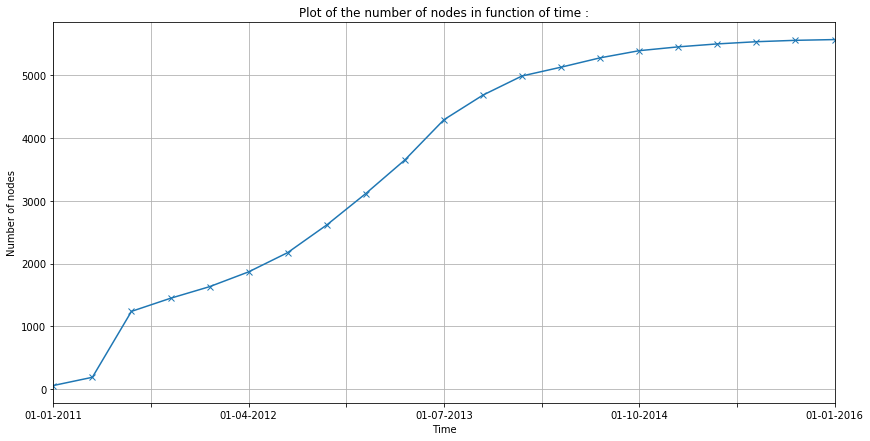

In [129]:
plt.figure(figsize=(14,7))
title = 'Plot of the number of nodes in function of time :'
df['node'].plot(style = '-x', title = title, grid = True)
plt.xlabel('Time')
plt.ylabel('Number of nodes')
plt.show()

   * The number of edges in the network.

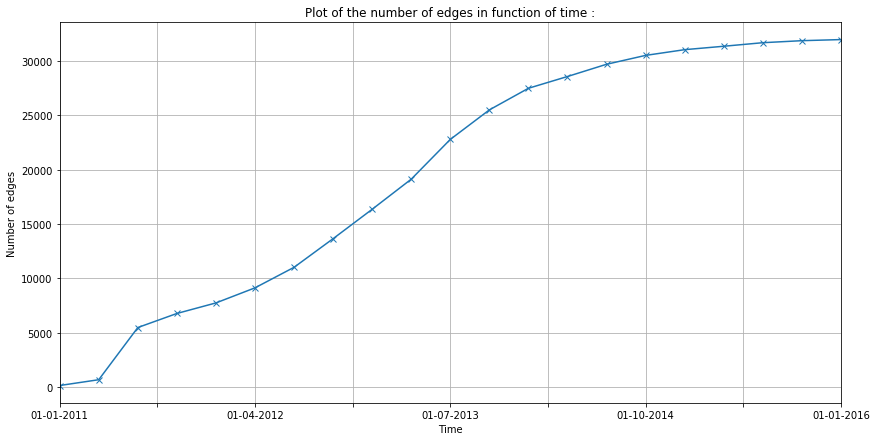

In [130]:
plt.figure(figsize=(14,7))
title = 'Plot of the number of edges in function of time :'
df['edge'].plot(style = '-x', title = title, grid = True)
plt.xlabel('Time')
plt.ylabel('Number of edges')
plt.show()

   * The average degree of nodes in the network.


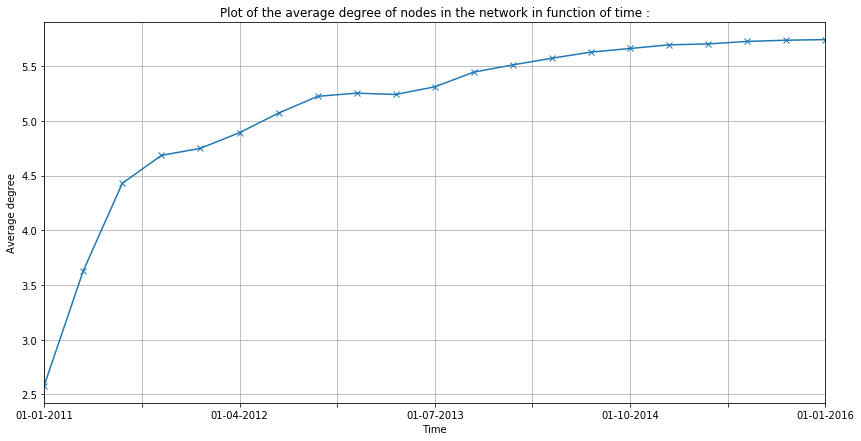

In [131]:
plt.figure(figsize=(14,7))
title = 'Plot of the average degree of nodes in the network in function of time :'
df['degree'].plot(style = '-x', title = title, grid = True)
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.show()

   * The density of the network.


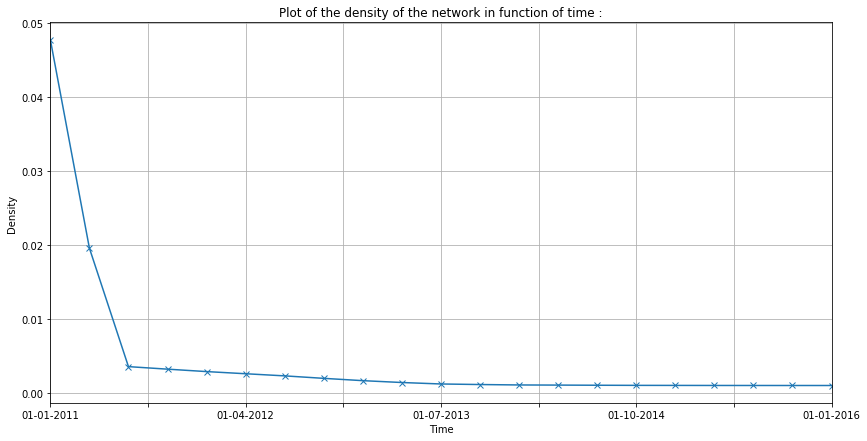

In [132]:
plt.figure(figsize=(14,7))
title = 'Plot of the density of the network in function of time :'
df['density'].plot(style = '-x', title = title, grid = True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

   * The average clustering coefficient of the network.

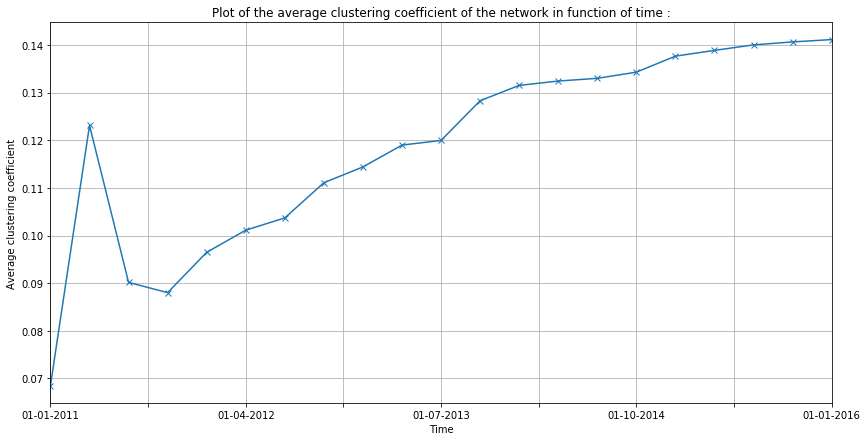

In [133]:
plt.figure(figsize=(14,7))
title = 'Plot of the average clustering coefficient of the network in function of time :'
df['clustering'].plot(style = '-x', title = title, grid = True)
plt.xlabel('Time')
plt.ylabel('Average clustering coefficient')
plt.show()

### 1.3

***Focusing first on the number of nodes and edges, what trends do you note in these plots?***

Focusing first on the number of nodes and edges, we are able to observe a kind of linear increasing trend until it reaches a plateau around the date 1/10/2014. 
In fact, the number of nodes increases from 55 at 01/01/2011 to 1867 at 01/04/2012 to 5394 at 01/10/2014 to then reach a plateau as the value for the last date (01/01/2016) is 5571, 5 steps after. 
The same trend is observable for the number of edges. In fact, the number of edges increases from 142 at 01/01/2011 to 9133 at 01/04/2012 to 30533 at 01/10/2014 to then reach a plateau as the value for the last date (01/01/2016) is 31989, 5 steps after.

**Thus, we can conclude that the trend is approximately a linear increasing trend  (quickly increase at onset) until it reaches a plateau around the date 01/10/2016.**

### 1.4

***Now focusing on the average degree and density, what trend(s) do you note?***

**The average degree in the function of time has a logarithmic increasing curve.** In fact, a logarithmic trend line is a best-fit curved line that is most useful when the rate of change in the data increases or decreases quickly and then levels out reaching a plateau (approximately at 01/10/2014). This is our case.

**The density in the function of time has an exponentially decreasing trend**: in fact, an exponentially decreasing trend is a function whose value decreases more quickly than any polynomial. This is our case. Then, it again reaches a plateau around after 4-time steps.

***Are they what you would have expected from what you noted in Question 2.***

I think in the first part of this question you want to mean Question 3 instead of Question 2 as question 2 was just: *plot, as a function of time, the following quantities*.
In question 3, we concluded on a kind of linear increasing trend until it reaches a plateau around the date 1/10/2014 for nodes and edges number. Thus by looking at these facts at first sight, without taking into account the scale of each measure, we would not have imagined exponential or logarithmic trend for density and average degree. In fact, the average degree is 2 times the number of edges divided by the number of nodes while the density of a network is defined as $D_{G}= L/L_{max}$ where $L_{max}$ is the (theoretical) maximum number of links that could possibly exist. Thus, for directed networks we get: $D_{G}= L/[N(N-1)]$.

**However, as the range of values for the degree is much smaller than the one for the edges (the number of edges is approximately 10 times higher  compared to number of nodes), it makes sense, due to the previous definition, to ends up with logarithmic increasing curve for average degree and an exponential decreasing trend for the density. In fact, the first measure divides the number of edges by the number of nodes while the second divide the number of edges by approximately the square of the number of nodes.**

Thus, by thinking a little bit and by observing this difference in scale, we would have expected that from what we noted in Question 2.

***Is this in line with what we would generally expect from an online network (see Lecture 8).***

According to Lecture 8, there are a few properties we see in almost all evolving social networks through :
   * Networks get denser over time.
   * In real networks diameter actually decreases as the network grows. This is due to densification and the presence of high degree nodes.
   * Degree distribution: The degree distribution remains unchanged and the tail gets broader.
   
**In our case, our network is not coming denser and denser with the time. The opposite process is observed which is not what we expected. This is due to the low increase in the number of edges compared to the increase in the number of nodes. In fact, the difference between these two measures is of magnitude 10.** In addition to these facts, the average degree increases and the distribution does not seem to change when we change the scale which is what we expect.

### 1.5

***Consider the average cluster coefficient. What is the trend here? Is this consistent with the trends found across the four previous measures? Why?***

The clustering coefficient in the function of time as **a kind of linearly increasing trend with small amplitude except for the second (01-04-2011) and third (01-07-2011) values that create an increasing peak (rapid increase and decrease) in the curve. Moreover, around the date 01/10/2014, it seems to reach a plateau again.**

Let's recall the clustering definition. In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes. The networks with the largest possible average clustering coefficient are found to have a modular structure, and at the same time, they have the smallest possible average distance among the different nodes.
The average clustering is the mean of the clustering coefficient of each node where the clustering coefficient of a node is the fraction of a node’s neighbors that are also linked. We also know that the clustering coefficient is linked with the diameter of the network. When clustering increases diameter decreases. Here, in a real network, we do observe that the clustering coefficient increases generally.

This trend is thus consistent with the previous trends found. In fact, we have seen that the number of nodes and the number of edges is approximately the same (difference by a factor 10 for the amplitude) linear increasing trend. In addition, they reach the plateau at the same time. This same plateau is visible in the average clustering coefficient curve. This increase in the same order of magnitude prevents the network to become denser and denser, a fact that can be seen on the density curve. This effect is also visible on the average degree plot with the small increase we describe before.**The same effect/process is visible on the average clustering plot : in fact, as the network as a smaller increase of the number of edges than for the number of nodes (plot 1 and 2 and 3 explaining the plot 4), the network has fewer opportunities to create a really high number of clusters but it can still create a few new clusters as the network increase in a slow way. Thus all the observe trends make sense together and thus the average cluster coefficient curve is consistent with the other trends. Moreover, the peak makes also sense as for these two dates, the increase of the number of edges has been a lot bigger than the one for the nodes (see that on plot 1 and 2).**

### 1.6

***Now let us consider links coming into the network. To do this we will use networkx's built in difference function, but to use that we must make sure we have the same node set across all networks. To get to that point, run the code found below under the heading 1.6. Then use the networkx function "difference" find the difference network between each quarter network and its previous quarter. For example, nx.difference(QuarterlyNetworks_AllNodes["01-07-2011"], QuarterlyNetworks_AllNodes["01-04-2011"]) returns a network containing all the links generated between 01-04-2011 and 01-07-2011. Print a brief summary of the statistics of each of these difference networks.***

In [134]:
all_nodes = CurrentNetwork.nodes() # All nodes of the final version of the network
QuarterlyNetworks_AllNodes = {}

for date, graph in QuarterlyNetworks.items(): # For all snapshots used previously, just add all the nodes not already in it
    g2 = graph.copy()
    for n in CurrentNetwork.nodes():
        if n not in g2.nodes():
            g2.add_node(n)
    
    QuarterlyNetworks_AllNodes[date] = g2

In [135]:
diff_dict = dict()
for i in range(len(QuarterlyNetworks_AllNodes.keys())-1):
    list_keys = list(QuarterlyNetworks_AllNodes.keys())
    tmp_diff = nx.difference(QuarterlyNetworks_AllNodes[list_keys[i+1]], QuarterlyNetworks_AllNodes[list_keys[i]]) # Calculate the difference
    diff_dict[f'{list_keys[i]}//{list_keys[i+1]}'] = tmp_diff # Store it in a dictionary
    print('-------------------------')
    print(f'For the date {list_keys[i]} and {list_keys[i+1]}, we have the following quarterly network difference :')
    print(nx.info(tmp_diff))
    print('-------------------------')

-------------------------
For the date 01-01-2011 and 01-04-2011, we have the following quarterly network difference :
Name: 01-04-2011
Type: DiGraph
Number of nodes: 5573
Number of edges: 533
Average in degree:   0.0956
Average out degree:   0.0956
-------------------------
-------------------------
For the date 01-04-2011 and 01-07-2011, we have the following quarterly network difference :
Name: 01-07-2011
Type: DiGraph
Number of nodes: 5573
Number of edges: 4804
Average in degree:   0.8620
Average out degree:   0.8620
-------------------------
-------------------------
For the date 01-07-2011 and 01-10-2011, we have the following quarterly network difference :
Name: 01-10-2011
Type: DiGraph
Number of nodes: 5573
Number of edges: 1294
Average in degree:   0.2322
Average out degree:   0.2322
-------------------------
-------------------------
For the date 01-10-2011 and 01-01-2012, we have the following quarterly network difference :
Name: 01-01-2012
Type: DiGraph
Number of nodes: 557

### 1.7

***Taking the network of links created between 01-04-2011 and 01-07-2011, calculate the average in degree of nodes on the "in" side of a new link. To do this, use the in degree of each node as it is in the 01-04-2011 snapshot. Thus, exclude nodes that do not exist yet in the 01-04-2011 snapshot (this requires you use the QuarterlyNetworks["01-04-2011"] network, not QuarterlyNetworks_AllNodes["01-04-2011"]). This quantity should be weighted by the number of times a given node participates in a new link in the "in" role.***

In [136]:
node_degree =[]
for new_link in diff_dict['01-04-2011//01-07-2011'].edges:
    node_dest = new_link[1]
    if (node_dest in list(QuarterlyNetworks["01-04-2011"].nodes)):
        node_degree.append(QuarterlyNetworks["01-04-2011"].in_degree(node_dest))
avg_in_degree = np.mean(node_degree)
print(f'The average in degree of nodes on the "in" side of a new link is {avg_in_degree}.')

The average in degree of nodes on the "in" side of a new link is 12.01031894934334.


### 1.8
**Repeat the previous calculation, but for out degree.**


In [137]:
node_degree =[]
for new_link in diff_dict['01-04-2011//01-07-2011'].edges:
    node_dest = new_link[1]
    if (node_dest in list(QuarterlyNetworks["01-04-2011"].nodes)):
        node_degree.append(QuarterlyNetworks["01-04-2011"].out_degree(node_dest))
avg_out_degree = np.mean(node_degree)
print(f'The average in degree of nodes on the "out" side of a new link is {avg_out_degree}.')

The average in degree of nodes on the "out" side of a new link is 12.059099437148218.


### 1.9
***What do you note about the average in and out degrees of nodes participating in new links?***

We observe that the average in and out degrees of nodes participating in new links are nearly the same: in degree is 12.01031894934334 and outdegree is 12.059099437148218. Thus the two values are nearly the same. In addition, 12 is a high degree meaning that the degree of nodes that participate to the new links are higher than the maximum average in and out degree observed in all the time steps (approximately 6).

***How do these quantities compare to the average degree of the 01-04-2011 quarterly snapshot?***

The average in and out degrees of the 01-04-2011 quarterly snapshot are both equal to 3.629032258064516. Thus, the average in and out degrees of nodes participating in new links is fourth time higher (which means much higher) compared to the previous snapshot at date 01-04-2011. This observation can lead us to think about preferential attachment.

***Does preferential attachment seem to be in play?***

Preferential attachment means that the more connected a node is, the more likely it is to receive new links. Nodes with a higher degree have a stronger ability to grab links added to the network. Intuitively, the preferential attachment can be understood if we think in terms of social networks connecting people. Here a link from A to B means that person A "knows" or "is acquainted with" person B. Heavily linked nodes represent well-known people with lots of relations. When a newcomer enters the community, they are more likely to become acquainted with one of those more visible people rather than with a relative unknown. 

**In fact, in our case, the degree of the node participating to the new links is higher than the average degree of the other nodes, meaning that nodes with a higher degree have stronger ability to grab links added to the network. This is the definition of preferential attachment. In fact, "Rich get richer".**

In [138]:
graph = QuarterlyNetworks["01-04-2011"]
print(f'The average in_degree of the 01-04-2011 quarterly snapshot is {np.mean(list(dict(graph.in_degree()).values()))}.')
print(f'The average out_degree of the 01-04-2011 quarterly snapshot is {np.mean(list(dict(graph.out_degree()).values()))}.')

The average in_degree of the 01-04-2011 quarterly snapshot is 3.629032258064516.
The average out_degree of the 01-04-2011 quarterly snapshot is 3.629032258064516.


---
## Problem 2
20 points.

Here we will explore the SIR model on the US flight network.

1. Install the ndlib package and make sure ndlib imports found below work. We will use this to simulate the SIR process. Documentation and examples for this package can be found [here](http://ndlib.readthedocs.io/en/latest/overview.html). Once ndlib is working, run all of the pre-prepared functions included below. [<span style="color:red">Technical</span>] [1]
2. Load the network 'USFlightNetwork.graphml' and print a summary. [<span style="color:red">Technical</span>] [1]
3. Using the InitializeSIRModel function below, initialize a SIR model in which Newark airport is the only node initially infected. Use the parameters $\beta = 0.01$ and $\gamma = 0.01$. Run this model for a number of iterations sufficient for the infection to die out (_i.e._ no infected nodes are left). Plot the trends using ndlib's DiffusionTrend function. [<span style="color:red">Technical</span>] [1]
4. How many iterations did it take for the infection to die out in the previous question? How many nodes did the infection spread to in total? How many iterations did it take for the outbreak peak (in terms of number of nodes infected)? [<span style="color:blue">Analytical</span>] [3]
5. Using the AverageOverSimulations and PlotTrends functions provided below, plot the averaged trends for an outbreak beginning at Newark. Use the same model initialized in Question 3. Choose the number of iterations inline with what you identified in Question 4. Average over 100 simulations. [<span style="color:red">Technical</span>] [1]
6. In the averaged plots, does the outbreak seem to die out after the same number of iterations as the single run (Question 3)? Is the total fraction of nodes infected the same as what you identified in Question 4. Does the peak in the number of infected nodes occur at the same number of iterations? [<span style="color:blue">Analytical</span>] [3]
7. Initialize a model in which the outbreak starts at Minot, North Dakota. Use the same values of $\beta$ and $\gamma$ as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Question 5. [<span style="color:red">Technical</span>] [1]
8. When the outbreak starts at Minot, does it end earlier or later than when it started at Newark? Does it infect more, or less, nodes in total? [<span style="color:blue">Analytical</span>] [2]
9. Use the PlotComparison function found below to directly compare the trends obtained for Newark and Minot. First make a plot in which x_max is set to the total number of iterations used in the models. Second, make a plot in which x_max is set to only 25. [<span style="color:red">Technical</span>] [1]
10. Read these plots carefully. What does the asymptotic value of the "recovered curve" tell us? Which outbreak reaches further? Which outbreak peaks more quickly? Is there a simple statistics/measure that may explain the differences we see between these two outbreaks? [<span style="color:blue">Analytical</span>] [3]
11. Now initialize a model in which the outbreak starts at Chicago. Use the same values of $\beta$ and $\gamma$ as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Questions 5 and 7. [<span style="color:red">Technical</span>] [1]
12. Use the PlotComparison function to compare the trends obtained for Newark and Chicago. Is there a significance between the two. If yes, to what do you attribute this. If no, make a guess as to why they are not different. [<span style="color:blue">Analytical</span>] [2]

#### Problem 2 Grades

2.1) None/1

2.2) None/1

2.3) None/1

2.4) None/3

2.5) None/1

2.6) None/3

2.7) None/1

2.8) None/2

2.9) None/1

2.10) None/3

2.11) None/1

2.12) None/2

Total: None/20

In [139]:
Problem2Score = None

---

### 2.1

***Install the ndlib package and make sure ndlib imports found below work. We will use this to simulate the SIR process. Documentation and examples for this package can be found here. Once ndlib is working, run all of the pre-prepared functions included below.*** 

In [140]:
!pip install ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIRModel as sir
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend 

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [141]:
def InitializeSIRModel(InitialInfected, Network, beta=0.01, gamma=0.01): #note that InitialInfected is a list of node ids
    sir_model = sir.SIRModel(Network) #create the ndlib model object
    
    #initialize the parameters
    sir_cfg = mc.Configuration()
    sir_cfg.add_model_parameter('beta', beta)
    sir_cfg.add_model_parameter('gamma', gamma)
    
    sir_cfg.add_model_initial_configuration('Infected', InitialInfected) #infect the nodes at which the infection starts

    sir_model.set_initial_status(sir_cfg)

    return sir_model

In [142]:
def AverageOverSimulations(model, n_nodes, n_iterations=100, n_simulations = 100): #n_nodes has to be the number of nodes in the network
    susceptible_count_mean = np.zeros(n_iterations)
    infected_count_mean = np.zeros(n_iterations)
    removed_count_mean = np.zeros(n_iterations)
    
    for i in range(n_simulations):  #execute the simulations n_simulations times
        iterations = model.iteration_bunch(n_iterations)  #execute this model n_iterations steps
        trends = model.build_trends(iterations)
        model.reset()  # reset the model
    
        susceptible_count_mean = susceptible_count_mean + np.array(trends[0]['trends']['node_count'][0])
        infected_count_mean = infected_count_mean + np.array(trends[0]['trends']['node_count'][1])
        removed_count_mean = removed_count_mean + np.array(trends[0]['trends']['node_count'][2])
        
    #Average over simulation runs, normalize by number of nodes and put in a dictionary
    Counts = {}
    Counts["susceptible"] = susceptible_count_mean/(n_simulations*n_nodes)
    Counts["infected"] = infected_count_mean/(n_simulations*n_nodes)
    Counts["removed"] = removed_count_mean/(n_simulations*n_nodes)
    
    return Counts

In [143]:
def PlotTrends(CountDictionary, title = None):
    n_iterations = len(CountDictionary["susceptible"])
    
    plt.figure(figsize=(10,6))
    plt.xlim(0, n_iterations)
    plt.plot(range(n_iterations), CountDictionary["susceptible"], label = 'Susceptible', color = 'steelblue')
    plt.plot(range(n_iterations), CountDictionary["infected"], label = 'Infected', color = 'lightblue')
    plt.plot(range(n_iterations), CountDictionary["removed"], label = 'Removed', color = 'orange')
    plt.xlabel('Iterations', fontsize=25)
    plt.ylabel('Fraction of nodes', fontsize=25)
    plt.title(title)
    plt.legend(fontsize=15)
    plt.show()

In [144]:
def PlotComparison(CountDictionary_1, CountDictionary_2, title=None, x_max = None):
    if x_max == None:
        x_max = max(len(CountDictionary_1["susceptible"]),len(CountDictionary_2["susceptible"]))
    
    DifferencedCountDictionary = {}
    for key in CountDictionary_1:
        DifferencedCountDictionary[key] = CountDictionary_1[key] - CountDictionary_2[key]
    
    plt.figure(figsize=(10,6))
    #having an x_max that can be independent of the number of iterations allows us to zoom in
    plt.xlim(0, x_max)
    plt.plot(range(x_max), DifferencedCountDictionary["susceptible"][:x_max], label = 'Susceptible', color = 'steelblue')
    plt.plot(range(x_max), DifferencedCountDictionary["infected"][:x_max], label = 'Infected', color = 'lightblue')
    plt.plot(range(x_max), DifferencedCountDictionary["removed"][:x_max], label = 'Removed', color = 'orange')
    plt.xlabel('Iterations', fontsize=25)
    plt.ylabel('Fraction of nodes', fontsize=25)
    plt.title(title)
    plt.legend(fontsize=15)
    plt.plot(range(x_max), x_max*[0.0], color='black')#this just adds a baseline at y=0
    plt.show()

In [145]:
# These are some specific airports we will use.
Newark   = "11618"
Chicago  = "13930"
Minot = "13433"

### 2.2
***Load the network 'USFlightNetwork.graphml' and print a summary.***

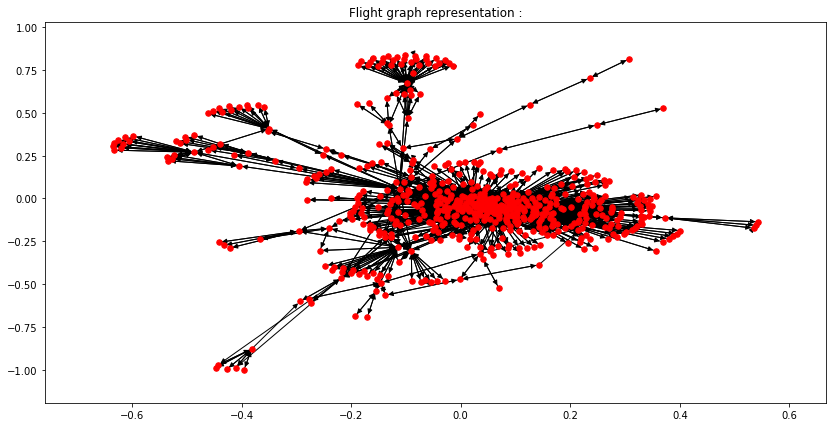

*** Summary of the info : ***
Name: 
Type: DiGraph
Number of nodes: 610
Number of edges: 7919
Average in degree:  12.9820
Average out degree:  12.9820


In [146]:
# load the data and create a graph
flight_graph = nx.read_graphml('./USFlightNetwork.graphml')
plt.figure(figsize=(14,7))
nx.draw_networkx(flight_graph, pos=nx.spring_layout(flight_graph), with_labels = False, node_size = 30)
plt.title('Flight graph representation :')
plt.show()
print('*** Summary of the info : ***')
print(nx.info(flight_graph))

In [147]:
# Nodes attributes
flight_graph.nodes['11150']

{'AirportID': '11150',
 'Country': 'US',
 'State': 'GA',
 'City': 'Columbus, GA',
 'Latitude': '32.51638889',
 'Longitude': '-84.93888889'}

In [148]:
# Edges attributes
flight_graph.edges[('11150', '10397')]

{'Total_Passengers': 40165.0, 'Distance': 83.0}

### 2.3

***Using the InitializeSIRModel function below, initialize a SIR model in which Newark airport is the only node initially infected. Use the parameters  β=0.01, and γ=0.01 . Run this model for a number of iterations sufficient for the infection to die out (i.e. no infected nodes are left). Plot the trends using ndlib's DiffusionTrend function.***

In [149]:
# Print Newark information
flight_graph.nodes[Newark]

{'AirportID': '11618',
 'Country': 'US',
 'State': 'NJ',
 'City': 'New York City, NY (Metropolitan Area)',
 'Latitude': '40.69250000',
 'Longitude': '-74.16861111'}

In [150]:
print(f'The out degree of the node corresponding to Newark airport is {list(dict(flight_graph.out_degree([Newark])).values())[0]}')
print(f'The in degree of the node corresponding to Newark airport is {list(dict(flight_graph.in_degree([Newark])).values())[0]}')

The out degree of the node corresponding to Newark airport is 98
The in degree of the node corresponding to Newark airport is 96


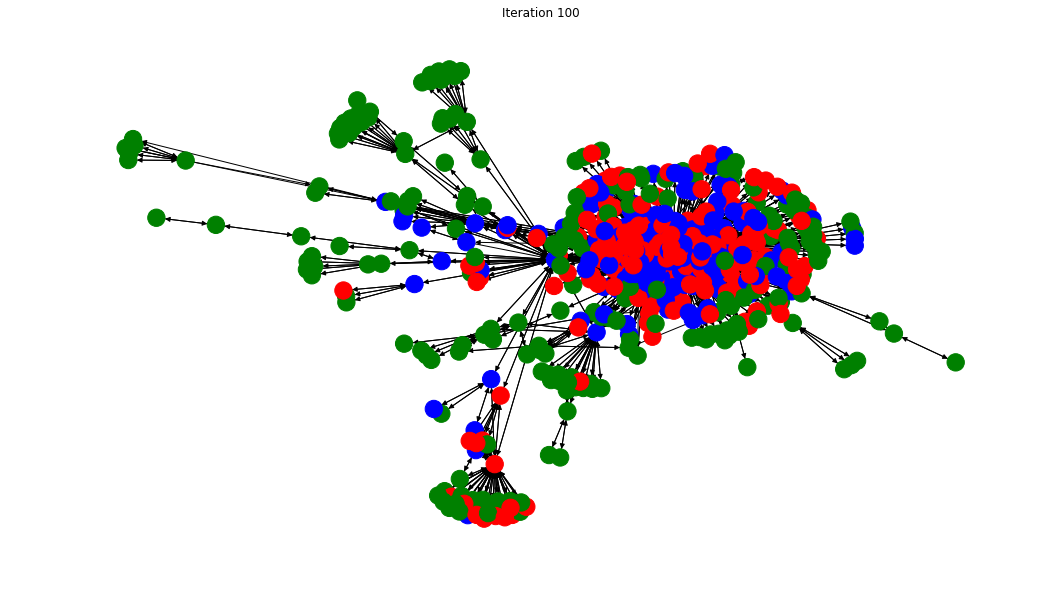

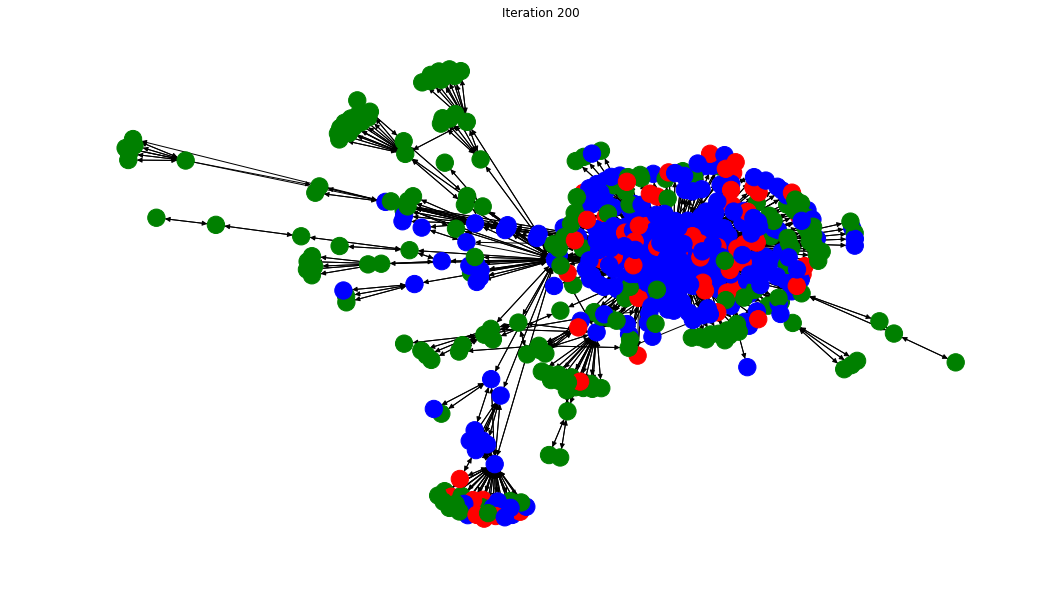

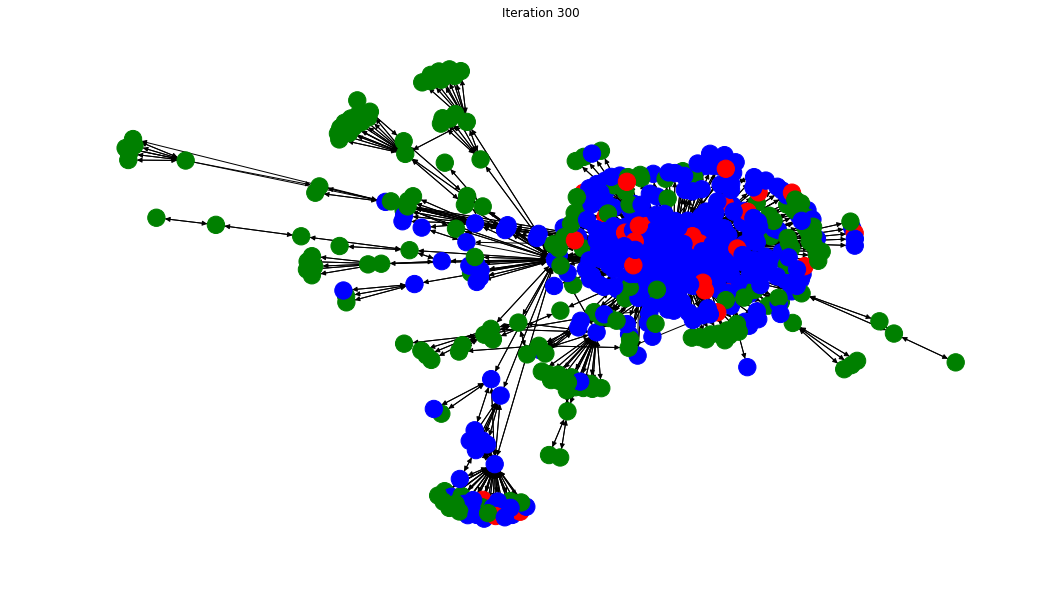

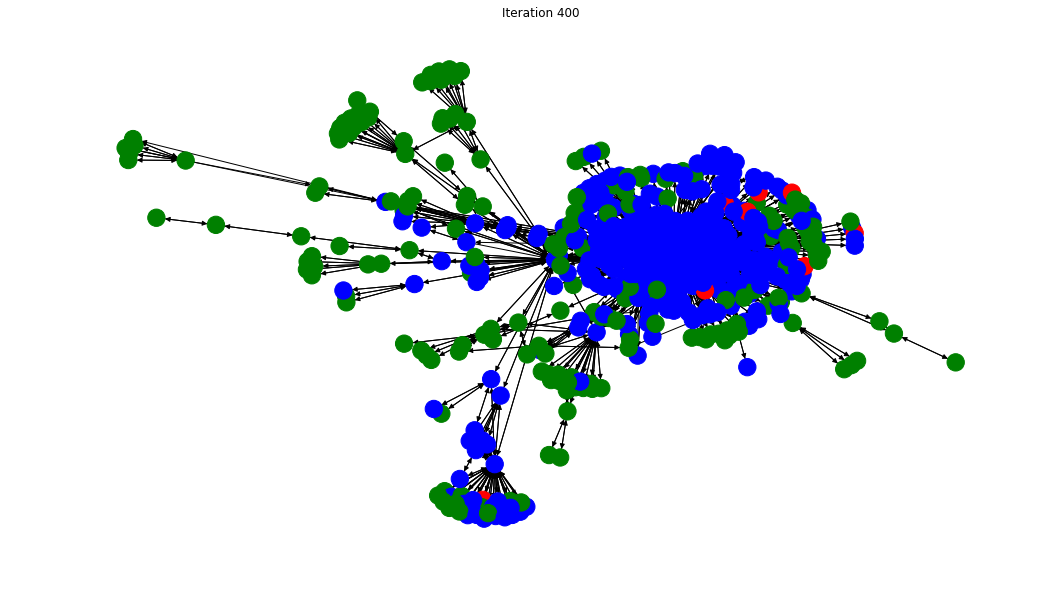

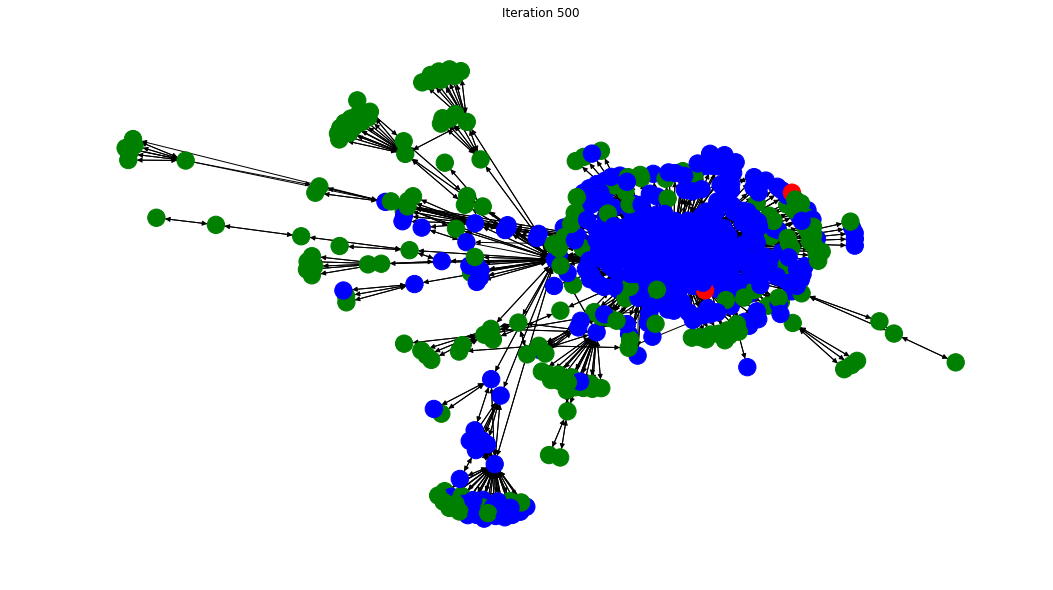

In [151]:
# Initialize a SIR model
# set Newark airport is the only node initially infected.
sir_model = InitializeSIRModel([Newark], flight_graph, beta=0.01, gamma=0.01)
current_status = sir_model.status

# graph's layout
pos = nx.spring_layout(flight_graph)
# nodes' colors, so that susceptible nodes are green, infected nodes are red, and removed nodes are blue
sir_colors = np.array(['green', 'red', 'blue'])

nb_susceptible_node, nb_infected_node, nb_resistant_node = [], [], []
count = 0
while 1 in list(current_status.values()):
    count = count + 1
    # Fill up the list
    nb_susceptible_node.append(list(current_status.values()).count(0))
    nb_infected_node.append(list(current_status.values()).count(1))
    nb_resistant_node.append(list(current_status.values()).count(2))
    # execute one iteration
    sir_model.iteration()
    current_status = sir_model.status
    if count%100 == 0:
        # plot the graph, with nodes' colors representing their states
        plt.figure(figsize=(18,10))
        nx.draw_networkx(flight_graph, pos, with_labels=False, node_color = sir_colors[list(current_status.values())])
        plt.title(f'Iteration {count}')
        plt.axis('off')
        plt.show()

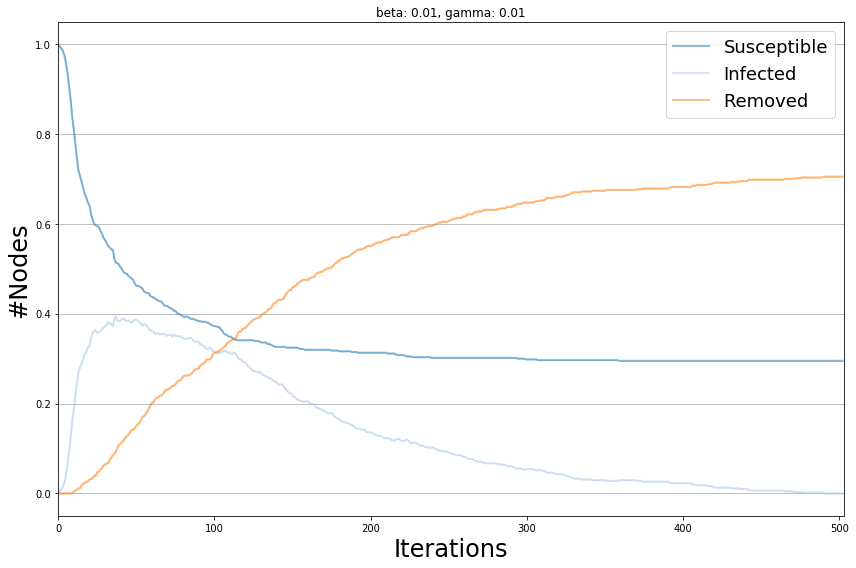

In [178]:
# Plot the trends using ndlib's DiffusionTrend function.
# Execute count iterations of the SIR model
sir_model = InitializeSIRModel([Newark], flight_graph, beta=0.01, gamma=0.01)
current_status = sir_model.status
sir_iter = sir_model.iteration_bunch(count)
trends = sir_model.build_trends(sir_iter)
# Plot the trend
viz = DiffusionTrend(sir_model, trends)
plt.figure(figsize=(12,8))
p2 = viz.plot()

### 2.4

***How many iterations did it take for the infection to die out in the previous question? How many nodes did the infection spread to in total? How many iterations did it take for the outbreak peak (in terms of number of nodes infected)?***


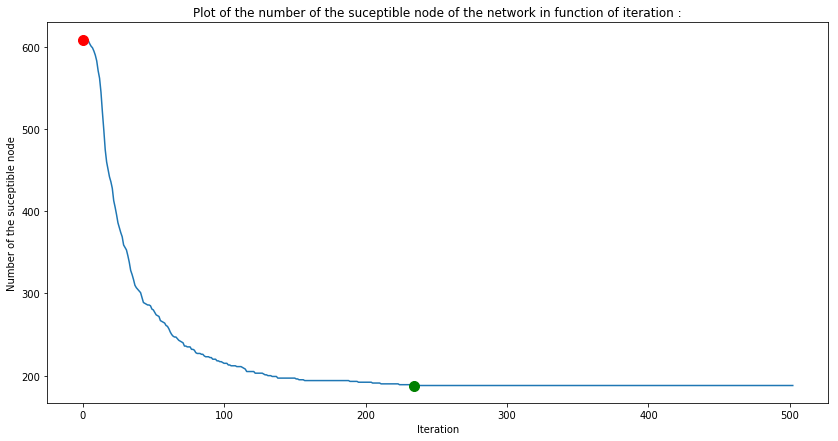

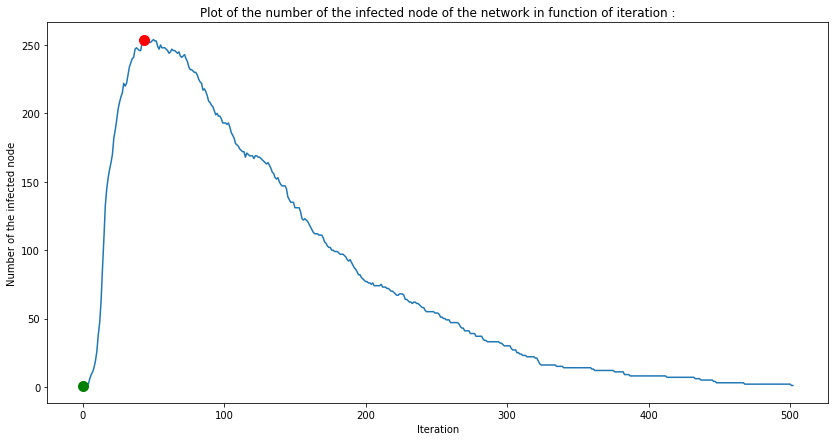

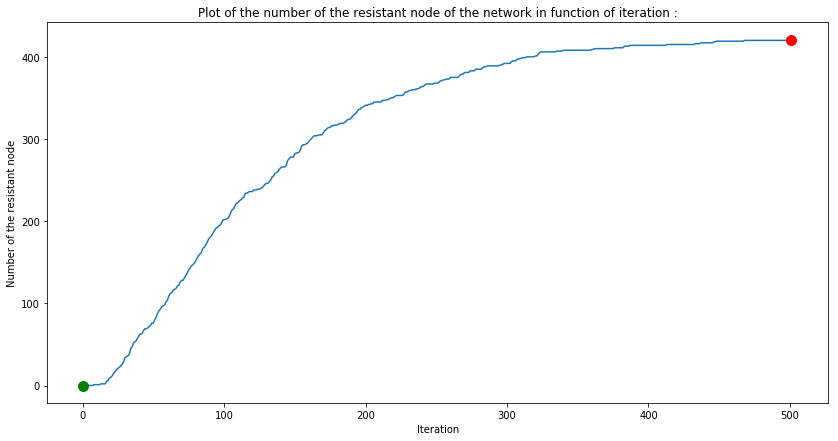

In [179]:
# Plot of the number of suceptible node
plt.figure(figsize=(14,7))
title = 'Plot of the number of the suceptible node of the network in function of iteration :'
plt.plot(nb_susceptible_node)
plt.plot(np.argmax(nb_susceptible_node), np.max(nb_susceptible_node), 'ro', markersize=10)
plt.plot(np.argmin(nb_susceptible_node), np.min(nb_susceptible_node), 'go', markersize=10)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Number of the suceptible node')
plt.show()

# Plot of the number of infected node
plt.figure(figsize=(14,7))
title = 'Plot of the number of the infected node of the network in function of iteration :'
plt.plot(nb_infected_node)
plt.plot(np.argmax(nb_infected_node), np.max(nb_infected_node), 'ro', markersize=10)
plt.plot(np.argmin(nb_infected_node), np.min(nb_infected_node), 'go', markersize=10)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Number of the infected node')
plt.show()

# Plot of the number of resistant node
plt.figure(figsize=(14,7))
title = 'Plot of the number of the resistant node of the network in function of iteration :'
plt.plot(nb_resistant_node)
plt.plot(np.argmax(nb_resistant_node), np.max(nb_resistant_node), 'ro', markersize=10)
plt.plot(np.argmin(nb_resistant_node), np.min(nb_resistant_node), 'go', markersize=10)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Number of the resistant node')
plt.show()

In [180]:
nb_resistant = trends[0]['trends']['node_count'][2][-1]
print(f'We needed {count} iterations for the infection to die out.\n')
print(f'The number of nodes infected during the spread are all the one in the state called removed. \nThe total number of nodes infected during the spread is : {nb_resistant} which is in fraction of nodes {nb_resistant/len(flight_graph.nodes)}\n')
print(f'The outbreak peak takes place at iteration number {np.argmax(nb_infected_node)}, when the number of infected was {np.max(nb_infected_node)} which is in fraction of nodes {np.max(nb_infected_node)/len(flight_graph.nodes)}.')

We needed 503 iterations for the infection to die out.

The number of nodes infected during the spread are all the one in the state called removed. 
The total number of nodes infected during the spread is : 430 which is in fraction of nodes 0.7049180327868853

The outbreak peak takes place at iteration number 43, when the number of infected was 254 which is in fraction of nodes 0.4163934426229508.


   * The infection dies out when none nodes of the graph are infected. We needed 503 iterations for the infection to die out.
   * The number of nodes infected during the spread is all the one in the state called removed. In fact, nodes that have been removed have been infected at some point in time. The total number of nodes infected during the spread is 430 which is in a fraction of nodes equal to 70%.
   * The outbreak peak is defined by the maximum number of node infected for a specific iteration: it takes place at iteration number 43 when the number of infected was 254 which is in a fraction of nodes equal to 41%.

### 2.5

***Using the AverageOverSimulations and PlotTrends functions provided below, plot the averaged trends for an outbreak beginning at Newark. Use the same model initialized in Question 3. Choose the number of iterations inline with what you identified in Question 4. Average over 100 simulations.***


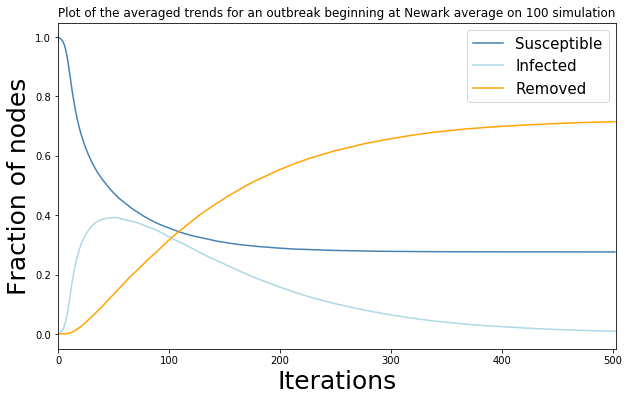

In [155]:
# Initialize a SIR model
# set Newark airport is the only node initially infected.
sir_model = InitializeSIRModel([Newark], flight_graph, beta=0.01, gamma=0.01)
# Average our results on 100 simulation
avg_simulation_counts_newark = AverageOverSimulations(sir_model, len(flight_graph.nodes()), n_iterations=count, n_simulations = 100)
# Plot the trends
PlotTrends(avg_simulation_counts_newark, title = 'Plot of the averaged trends for an outbreak beginning at Newark average on 100 simulation')

### 2.6

***In the averaged plots, does the outbreak seem to die out after the same number of iterations as the single run (Question 3)?***

In question 3, we find out that the infection was dying after approximately 500 iterations. To know that in the averaged plots, we need to look at the infected curve and find when the value of the measure is near zero. In our case, around 500 iterations the number of infected nodes seems to be 0 and thus in this average plots, approximately 500 iterations are needed to make the outbreak die. **This outbreak seems to die out after approximately the same number of iterations as the single run.

***Is the total fraction of nodes infected the same as what you identified in Question 4.***

**The total fraction of nodes infected during the spread is the same as the one we found in Question 4.** In fact, both are approximately 0.4 at the outbreak peak and approximately 0.7 for the total number of nodes infected during the spread. In fact, the infected trends as the same shape and values when you look at question 2 and 5.

***Does the peak in the number of infected nodes occur at the same number of iterations?***

Again, **the peak in the number of infected nodes occur at the same number of iterations as for question 2 which is near iteration number 40.**

The trends figure are similar between question 2 and 5 explaining all these concordances in our answer.

**In conclusion, a single run is a nice approximation of several simulations as none of the previous properties were different.**

### 2.7

***Initialize a model in which the outbreak starts at Minot, North Dakota. Use the same values of  β  and  γ  as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Question 5.***

In [156]:
# Print Minot information
flight_graph.nodes[Minot]

{'AirportID': '13433',
 'Country': 'US',
 'State': 'ND',
 'City': 'Minot, ND',
 'Latitude': '48.25777778',
 'Longitude': '-101.27805556'}

In [157]:
print(f'The in degree of the node corresponding to Minot airport is {list(dict(flight_graph.in_degree([Minot])).values())[0]}')
print(f'The out degree of the node corresponding to Minot airport is {list(dict(flight_graph.out_degree([Minot])).values())[0]}')

The in degree of the node corresponding to Minot airport is 6
The out degree of the node corresponding to Minot airport is 6


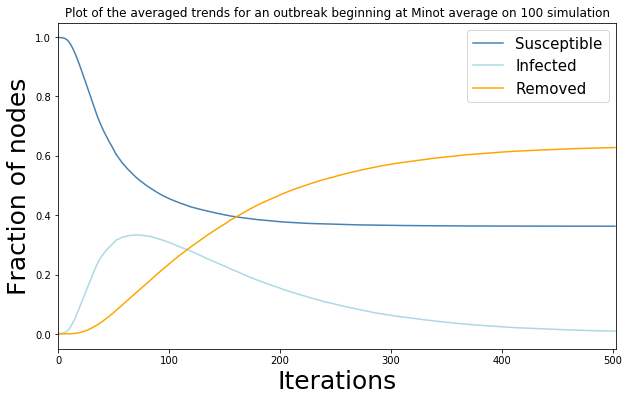

In [158]:
# Initialize a SIR model
# set Minot airport is the only node initially infected.
sir_model = InitializeSIRModel([Minot], flight_graph, beta=0.01, gamma=0.01)
# Average our results on 100 simulation
avg_simulation_counts_minot = AverageOverSimulations(sir_model, len(flight_graph.nodes()), n_iterations=count, n_simulations = 100)
# Plot the trends
PlotTrends(avg_simulation_counts_minot, title = 'Plot of the averaged trends for an outbreak beginning at Minot average on 100 simulation')

### 2.8

***When the outbreak starts at Minot, does it end earlier or later than when it started at Newark? Does it infect more, or less, nodes in total?***


In [185]:
from sklearn.metrics import auc
newark = auc(np.linspace(1,len(avg_simulation_counts_newark['infected']),len(avg_simulation_counts_newark['infected'])),avg_simulation_counts_newark['infected'])
minot = auc(np.linspace(1,len(avg_simulation_counts_minot['infected']),len(avg_simulation_counts_minot['infected'])),avg_simulation_counts_minot['infected'])
print(f'The proportion of nodes infected in total when the spread started at Newark is : {newark}')
print(f'The proportion of nodes infected in total when the spread started at Minot is : {minot}')

infected_newark = avg_simulation_counts_newark['infected']
print(f'The outbreak end takes place at iteration number {np.argmin(infected_newark[10:])} when it started at Newark')
infected_minot = avg_simulation_counts_minot['infected']
print(f'The outbreak end takes place at iteration number {np.argmin(infected_minot[10:])} when it started at Minot')

print(f'The outbreak for Newark spread peak takes place at iteration number {np.argmax(infected_newark)}, when the number of infected was {np.max(infected_newark)} which is in fraction of nodes {np.round(np.max(infected_newark)*len(flight_graph.nodes))}.')
print(f'The outbreak for Minot spread peak takes place at iteration number {np.argmax(infected_minot)}, when the number of infected was {np.max(infected_minot)} which is in fraction of nodes {np.round((np.max(infected_minot)*len(flight_graph.nodes)))}.')

The proportion of nodes infected in total when the spread started at Newark is : 71.70429508196722
The proportion of nodes infected in total when the spread started at Minot is : 62.30727049180328
The outbreak end takes place at iteration number 492 when it started at Newark
The outbreak end takes place at iteration number 492 when it started at Minot
The outbreak for Newark spread peak takes place at iteration number 52, when the number of infected was 0.39211475409836066 which is in fraction of nodes 239.0.
The outbreak for Minot spread peak takes place at iteration number 72, when the number of infected was 0.3334590163934426 which is in fraction of nodes 203.0.


From the values found just above, several conclusions can be drawn :
   * The proportion of nodes infected in total during the spread is bigger when it started at Newark: approximately 70% for Newark while approximately 60% for Minot.
   * When the outbreak starts in Minot, it seems to end after approximately 500 iterations, as for when it starts in Newark. It seems that when the outbreak starts at Minot, it ends at the same time as when it started at Newark.
   
**Thus, when we find carefully the real values thanks to the code in the previous cell, we can conclude that the spread dies approximately at the same time for both airports of departure of the spread. In addition, the total number of infected airports is smaller when the spread started at Minot (nearly 10% smaller for Minot infection).**

### 2.9

***Use the PlotComparison function found below to directly compare the trends obtained for Newark and Minot. First make a plot in which x_max is set to the total number of iterations used in the models. Second, make a plot in which x_max is set to only 25.***


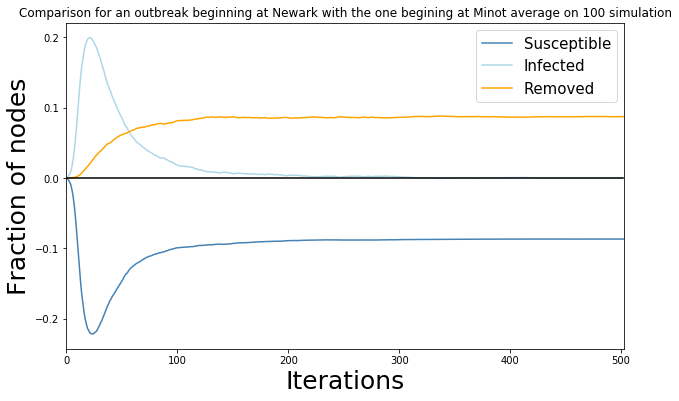

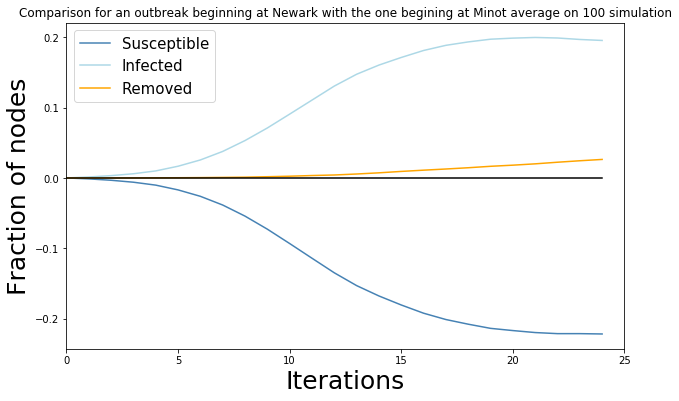

In [160]:
# x_max = count
PlotComparison(avg_simulation_counts_newark, avg_simulation_counts_minot, title='Comparison for an outbreak beginning at Newark with the one begining at Minot average on 100 simulation with x_max approximately 500', x_max = count)
# x_max = 25
PlotComparison(avg_simulation_counts_newark, avg_simulation_counts_minot, title='Comparison for an outbreak beginning at Newark with the one begining at Minot average on 100 simulation with x_max equal to 25', x_max = 25)

### 2.10

***Read these plots carefully. What does the asymptotic value of the "recovered curve" tell us? Which outbreak reaches further? Which outbreak peaks more quickly? Is there a simple statistics/measure that may explain the differences we see between these two outbreaks?*** 

The function used to plot the difference between the trends of the two models trends given as input. Thus, in our case, as the first input is linked to Newark infection, it means that when the trends output will be positive, more nodes are implicated in the corresponding state for the spread starting at Newark. On the opposite, if the difference is negative, it means that more nodes are implicated in the observed pattern for the spread starting at Minot than the one at Newark.

Thus, in our case, we can see that more nodes are infected when the spread started at Newark and thus, by definition, the number of susceptible nodes is smaller for the spread beginning at Newark compared to the one started at Minot. In fact, these two measures are extremely linked. They are like symmetric with axis y = 0.

In addition, by consequences, the number of removed/resistant nodes is bigger for the spread started at Newark as this number also depends a lot on the number of infected nodes. 

All this conclusion can be drawn by looking at the sign of the difference in the previous plot.


***What does the asymptotic value of the "recovered curve" tell us?***

Asymptote used to refer to a line in math that is tangent to a curve at infinity. **In globality, it gives you the rate of change for the observed quantity. More precisely, it gives you the differential rate of change between  two spreads.** For example, when you look at an asymptotic value around iteration 600, you find out that this value is 0 for the three curves meaning that we reach a stable equilibrium for both spreads. This equilibrium means that our models are not able to involve more nodes and thus in our case we reach the end of the spreading. **The fraction of nodes reach by each curve represent the differential number of nodes implies in each case as explained before.**

More precisely, **the asymptotic value of the "recovered curve" (which correspond to the removed curve) indicates the difference of nodes that recovered from the infection between the simulations where the outbreak started in Newark compared to where it started in Minot.** Here, when the outbreak starts in Newark, more nodes recover from the infection compared with when it starts in Minot, as the value is positive. It makes sense as we previously show that the number of infected nodes is bigger for Newark infection.

Moreover, when you look at asymptotic values for infected nodes around iteration 20, you see a high value showing that the number of infected nodes increases in a fast way compared to the increase of the spread beginning at Minot. Then around iteration 60, the opposite process can be observed meaning that the number of infected nodes decreases faster for the spread beginning at Newark. Then, as we said just before, equilibrium is reached and as for both cases the infection ends, the difference between the trends is 0 and the asymptotic value is also 0.

The same process can be visualized for the Susceptible nodes but in the slightly another opposite way: first, the number of susceptible nodes decreases faster for the spread started at Newark and then this number decrease also faster for the spread started at Minot. Again equilibrium is reached after a few iterations. In fact, this curve is symmetric to the infected curve describe just before.

***Which outbreak reaches further?***

This answer depends on the meaning of *'reach further'* : 
   * If this means in term of number of nodes here is our answer: more nodes recover in the Newark infection. It means that more nodes were infected (as we said before) and that in terms of number of nodes removed the outbreak reach further when it starts in Newark. 

   * If this means in term of time to end the infection: ss the asymptotic values of the infected nodes is first positive and then negative with a fraction of node-positive, the outbreak that reaches further in term of time is the one stated at Minot. 
   
All explanations needed to understand that is just above.

***Which outbreak peaks more quickly?***

As the asymptotic values of the infected nodes curve are first positive with a fraction of node-positive, the outbreak peaks are more quickly reach for the spread started at Newark. All explanations needed to understand that is just above.


***Is there a simple statistics/measure that may explain the differences we see between these two outbreaks?***

The main difference that can explain the differences is **the out degree**. In fact, as out degree is different, the infection cannot spread in the same way. More precisely, it's easier for an infection to spread in the network if the node of departure has a higher outdegree. In our case, the Newark airport has an outdegree of 98 in opposition to the Minot airport, which has an outdegree of 6. This makes sense since Newark is an important airport, most probably larger than Minot. This means that as it has more routes to spread, a higher total number of infected nodes will be observed for Newark.

### 2.11

***Now initialize a model in which the outbreak starts at Chicago. Use the same values of  β  and  γ  as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Questions 5 and 7.***


In [161]:
# Print Minot information
flight_graph.nodes[Chicago]

{'AirportID': '13930',
 'Country': 'US',
 'State': 'IL',
 'City': 'Chicago, IL',
 'Latitude': '41.97722222',
 'Longitude': '-87.90805556'}

In [162]:
print(f'The in degree of the node corresponding to Chicago airport is {list(dict(flight_graph.in_degree([Chicago])).values())[0]}')
print(f'The out degree of the node corresponding to Chicago airport is {list(dict(flight_graph.out_degree([Chicago])).values())[0]}')

The in degree of the node corresponding to Chicago airport is 167
The out degree of the node corresponding to Chicago airport is 168


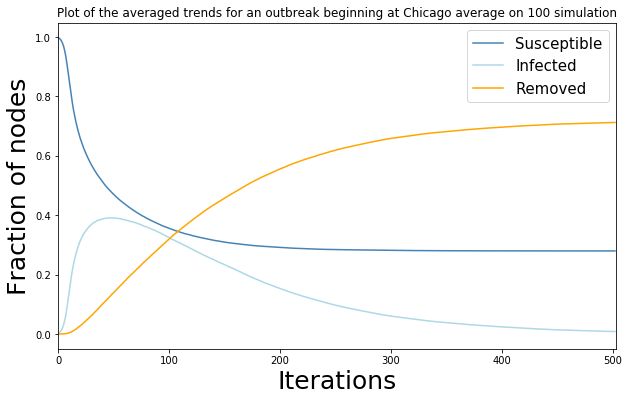

In [163]:
# Initialize a SIR model
# set Chicago airport is the only node initially infected.
sir_model = InitializeSIRModel([Chicago], flight_graph, beta=0.01, gamma=0.01)
# Average our results on 100 simulation
avg_simulation_counts_chicago = AverageOverSimulations(sir_model, len(flight_graph.nodes()), n_iterations=count, n_simulations = 100)
# Plot the trends
PlotTrends(avg_simulation_counts_chicago, title = 'Plot of the averaged trends for an outbreak beginning at Chicago average on 100 simulation')

### 2.12

***Use the PlotComparison function to compare the trends obtained for Newark and Chicago. Is there a significance between the two. If yes, to what do you attribute this. If no, make a guess as to why they are not different.***

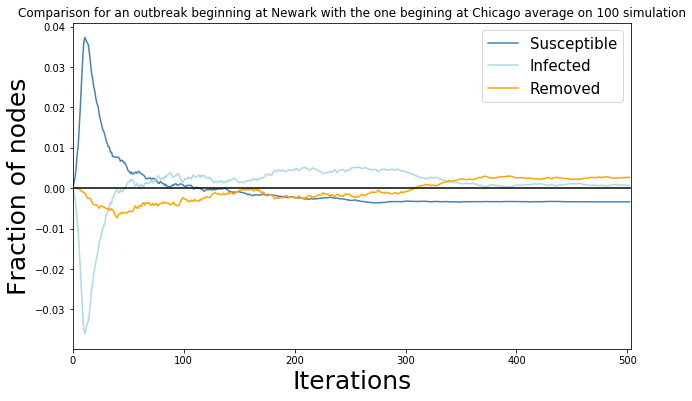

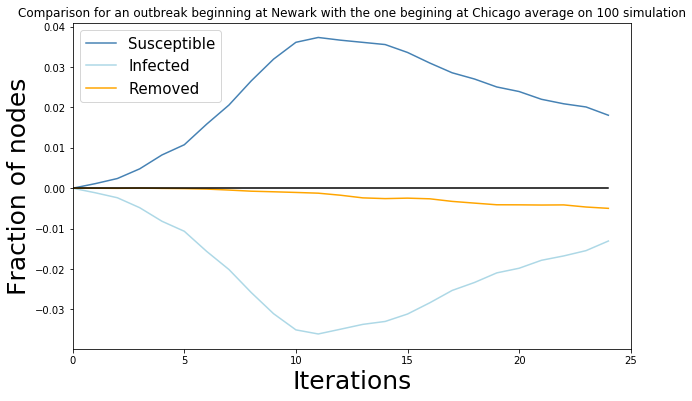

In [164]:
# x_max = count
PlotComparison(avg_simulation_counts_newark, avg_simulation_counts_chicago, title='Comparison for an outbreak beginning at Newark with the one begining at Chicago average on 100 simulation', x_max = count)
# x_max = 25
PlotComparison(avg_simulation_counts_newark, avg_simulation_counts_chicago, title='Comparison for an outbreak beginning at Newark with the one begining at Chicago average on 100 simulation', x_max = 25)

***Is there a significance between the two. If yes, to what do you attribute this. If no, make a guess as to why they are not different.***

In this case, there is a significant difference between the infection started at Newark and in Chicago. 

In this case, Chicago's infection spread faster and thus infected more nodes in a smaller amount of time. In fact, the removed curve is negative meaning that fewer nodes are removed when the outbreak starts in Newark compared to when it starts in Chicago. This is mainly due to the fact that there are more infected nodes when it starts in Chicago (infected curve is the first negative). Then, in a second part of the spreading, the number of infected nodes become larger for the Newark infection leading to a removed curve positive. It means that as time passes, the Newark spreading infected more nodes. Again, around iteration 400 an equilibrium is reached. 

Thus, as before, by knowing that Chicago's spread is faster as you can see of the figure with the infected curve having a negative fraction of node, the same relation between the 3 curves apply and thus similar conclusion can be drawn. 

**This observation is again due to the out-degree of each node: in fact, the degree of Chicago's node is twice (168) bigger than the one of Newark (98). This statistic shows that Chicago (while in reality, Chicago is one of the biggest airports in the US) is a biggest airport that Newark (in term of number of connections to other airports) allowing an easier and quicker spread through the network since the Chicago's node is more important. To verify the importance of Chicago's node we could check the centrality measures.**


----
## Problem 3
13 points.

In this problem you will explore the simple threshold model on the social network: 'fb_combined.txt'.

1. Using ndlib, set up a threshold model with $q=0.33$. Initialize the model such that 10% of the nodes start infected. Run for 200 iterations. Plot the diffusion trend. _hint_: See the example [here](http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html) [<span style="color:red">Technical</span>] [2]
2. Does the outbreak take over the entire network? Run the simulation two or three more times. Do you get different results? [<span style="color:blue">Analytical</span>] [1]
3. Now we will look for the most influential node in the network. To do this, build a loop over all of the nodes in the network. In each iteration of the loop, initialize the model from scratch (this is important! you don't want to carry over any node states) and start the simulation with only the loop node infected. Run the simulation for __20__ (not 200!) iterations and record how many nodes end up infected. [<span style="color:red">Technical</span>] [2]
4. Which node is the most influential? What percentage of the network does its cascade infect? What is its degree? Check a couple of other basic node properties (_ex_. closeness, betweenness, PageRank, _etc_.). Is the most influential node unusual in any of these measures? [<span style="color:blue">Analytical</span>] [2]
5. We will now look for the set of 5 nodes that are most influential (as a group) by way of a greedy algorithm. Pattern your solution on this pseudo code:
>MostInfluentialNodes = [ ]
>
>while len(MostInfluentialNodes) < 5:
>
>>MaxNode = None
>>
>>for LoopNode in Network:
>>
>>>initialize model
>>>
>>>infect all nodes already in MostInfluentialNodes
>>>
>>>infect LoopNode as well
>>>
>>>run simulation for 20 iterations
>>>
>>>is the number of infected the largest you've seen in this iteration of the while loop? If so, LoopNode becomes MaxNode
>>
>>append MaxNode to MostInfluentialNodes
>
>[<span style="color:red">Technical</span>] [3]
6. Which set of 5 nodes emerge as the most influential? What percentage of the network does their cascade infect? How does this compare to the average reach of randomly infecting 10% of the nodes as done in Questions 1 and 2. [<span style="color:blue">Analytical</span>] [1] 
7. What is the degree of the most influential nodes? How far apart are they in the network (print the pairwise distances)? Do they stand out for any other basic node properties/centrality measures? Test at least 2 or 3 measures. [<span style="color:blue">Analytical</span>] [2]


#### Problem 3 Grades

3.1) None/2

3.2) None/1

3.3) None/2

3.4) None/2

3.5) None/3

3.6) None/1

3.7) None/2

Total: None/13

In [165]:
Problem3Score = None

---

In [166]:
import ndlib.models.epidemics.ThresholdModel as th

FB_Network = nx.read_edgelist('fb_combined.txt', create_using=nx.Graph(), nodetype=int)

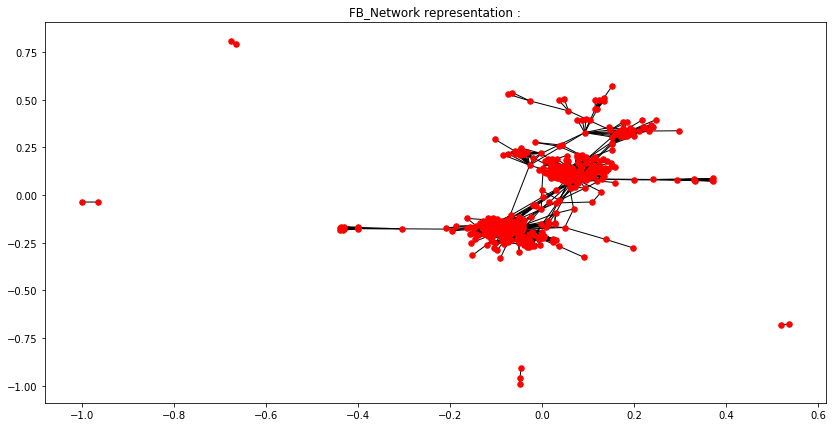

*** Summary of the info : ***
Name: 
Type: Graph
Number of nodes: 486
Number of edges: 4037
Average degree:  16.6132


In [167]:
plt.figure(figsize=(14,7))
nx.draw_networkx(FB_Network, pos=nx.spring_layout(FB_Network), with_labels = False, node_size = 30)
plt.title('FB_Network representation :')
plt.show()
print('*** Summary of the info : ***')
print(nx.info(FB_Network))

---

### 3.1

***Using ndlib, set up a threshold model with $q=0.33$. Initialize the model such that 10% of the nodes start infected. Run for 200 iterations. Plot the diffusion trend. _hint_: See the example [here](http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html):***

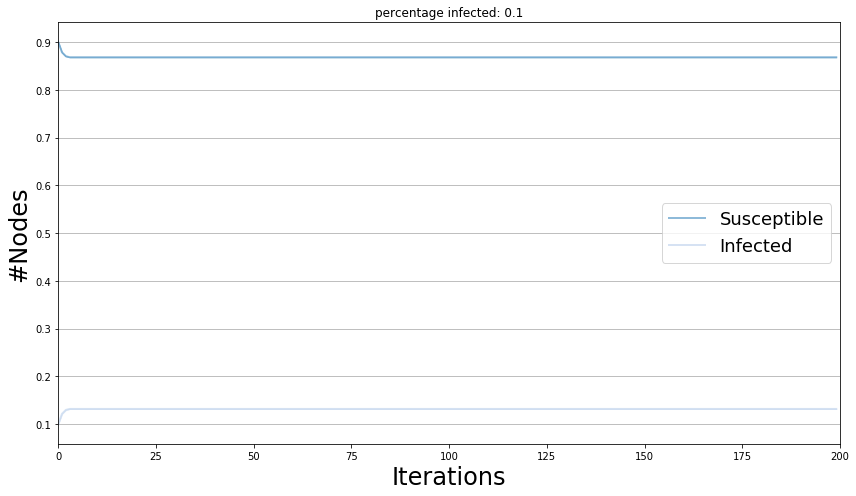

In [168]:
# Model selection
model = th.ThresholdModel(FB_Network)
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)
# Setting node parameters
threshold = 0.33
for i in FB_Network.nodes():
    config.add_node_configuration("threshold", i, threshold)
model.set_initial_status(config)
# Simulation execution
iterations = model.iteration_bunch(200)

# plot the diffusion trend
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
plt.figure(figsize=(12,7))
p1 = viz.plot()

### 3.2
***Does the outbreak take over the entire network? Run the simulation two or three more times. Do you get different results?***

The infection never takes over the entire network. In fact, by running the simulation several times, we are able to conclude that the infection always reaches a plateau before 25 iterations. Reach a plateau means that the number of susceptible nodes and the number of infected nodes reach value and then never change during the following iteration. An equilibrium is reached. 

Only one thing is changing when running different simulations is the proportion of nodes defining this plateau (between 0.1 to 0.4). The principal properties of theses plateau are the symmetry of the one representing the susceptible node and the one representing the infected node with the axis y=0.5.

**To conclude, when running two or three times the simulation we get different results for the value of the two plateau. The symmetric property of these with the axis y=0.5 stays. Even if we run it several times, the infection never take over the entire network.**

### 3.3
***Now we will look for the most influential node in the network. To do this, build a loop over all of the nodes in the network. In each iteration of the loop, initialize the model from scratch (this is important! you don't want to carry over any node states) and start the simulation with only the loop node infected. Run the simulation for __20__ (not 200!) iterations and record how many nodes end up infected.***


In [204]:
count_node_infected = pd.DataFrame(index = list(FB_Network.nodes()), columns = ['Infected_count'])
for node in list(FB_Network.nodes()):
    # Model selection
    model = th.ThresholdModel(FB_Network)
    # Model Configuration
    config = mc.Configuration()
    config.add_model_initial_configuration('Infected', [node]) #infect the nodes at which the infection starts
    # Setting node parameters
    threshold = 0.33
    for i in FB_Network.nodes():
        config.add_node_configuration("threshold", i, threshold)
    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(20)
    trends = model.build_trends(iterations)
    count_node_infected.loc[node, 'Infected_count'] = trends[0]['trends']['node_count'][1][-1] 

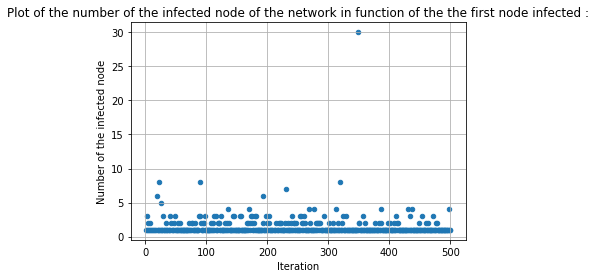

In [205]:
# Plot of the number of resistant node
plt.figure(figsize=(15,7))
title = 'Plot of the number of the infected node of the network in function of the the first node infected :'
count_node_infected['Index'] = list(count_node_infected.index)
count_node_infected.plot(x='Index', y='Infected_count', title = title, kind='scatter', grid = True)
plt.xlabel('Iteration')
plt.ylabel('Number of the infected node')
plt.show()

### 3.4

***Which node is the most influential? What percentage of the network does its cascade infect? What is its degree? Check a couple of other basic node properties (_ex_. closeness, betweenness, PageRank, _etc_.). Is the most influential node unusual in any of these measures?***


In [207]:
print(f'The node which is the most influential is node number {count_node_infected[count_node_infected.Infected_count == count_node_infected.Infected_count.max()].index[0]}.\n')
print(f'The number of node infected by this node is {count_node_infected[count_node_infected.Infected_count == count_node_infected.Infected_count.max()].Infected_count.values[0]}.')
print(f'Thus the percentage of the network this cascade infect is {count_node_infected[count_node_infected.Infected_count == count_node_infected.Infected_count.max()].Infected_count.values[0]/count_node_infected.shape[0]*100}%\n')
print(f'The degree of this node is {FB_Network.degree[348]} when the max degree is {dict(FB_Network.degree)[max(dict(FB_Network.degree), key=dict(FB_Network.degree).get)]}.\n')
print(f'The closeness of this node is {nx.closeness_centrality(FB_Network)[348]} when the max is {nx.closeness_centrality(FB_Network)[max(nx.closeness_centrality(FB_Network), key=nx.closeness_centrality(FB_Network).get)]}.')
print(f'The betweenness of this node is {nx.betweenness_centrality(FB_Network)[348]} when the max is {nx.betweenness_centrality(FB_Network)[max(nx.betweenness_centrality(FB_Network), key=nx.betweenness_centrality(FB_Network).get)]}.')
print(f'The PageRank value of this node is {nx.pagerank(FB_Network)[348]} when the max is {nx.pagerank(FB_Network)[max(nx.pagerank(FB_Network), key=nx.pagerank(FB_Network).get)]}.')
print(f'The EigenVector value of this node is {nx.eigenvector_centrality(FB_Network)[348]} when the max is {nx.eigenvector_centrality(FB_Network)[max(nx.eigenvector_centrality(FB_Network), key=nx.eigenvector_centrality(FB_Network).get)]}.')

The node which is the most influential is node number 348.

The number of node infected by this node is 30.
Thus the percentage of the network this cascade infect is 6.172839506172839%

The degree of this node is 156 when the max degree is 156.

The closeness of this node is 0.25853182640247835 when the max is 0.32329896907216493.
The betweenness of this node is 0.35639716049347464 when the max is 0.35639716049347464.
The PageRank value of this node is 0.019761704688140855 when the max is 0.019761704688140855.
The EigenVector value of this node is 0.0002015095989515001 when the max is 0.1981462660668606.


**The most influential node is the one creating a higher number of infected nodes. Logically, this node should be the more central one and thus the one having the higher degree.** In fact, a higher degree allows a huge number of connections to other nodes creating an easier spreading of the infection. In this way, a higher number of nodes can be infected and these infected nodes can be in different subparts of the graph allowing a more global spreading. 

In our case, **the most influential node create 30 infected nodes. As expected, it is the node with the highest degree in the graph, with a degree of 156 allowing an easier spreading. The closeness value is not too far from the maximum closeness and the betweenness of this node is the highest one in the graph. This indicates a high centrality and underlines the huge impact on the network of this node.**

In fact, **Betweenness centrality** quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. In this conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices, have a high betweenness. Betweenness Centrality says a node/edge is important when it lies on the shortest path between many pairs of nodes. Moreover, in a connected graph, the **closeness centrality** of a node is the average length of the shortest path between the node and all other nodes in the graph. It is the inverse of its average distance to all other nodes in the network. Thus the more central a node is, the closer it is to all other nodes. 

In addition, we also look at two other measures: PageRank and eigenvector values. **This node has the highest Pagerank value of the entire network but it has a really small eigenVector measure. Thus, the eigenvector value of our most influential node is unusual.** **Eigenvector centrality** is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. The main principle is the following: the centrality of each node should be a weighted average of its neighbors' centralities. Eigenvector Centralities says a node is important when its neighbors are important, as calculated in a self-consistent manner. **PageRank** is an eigenvector centrality measure but it seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time. PageRank says a node is important when it is likely to be randomly walked to. This is a global diffusion/flow process. **Thus this observation means that our most influential node is likely to be randomly walked to but this node is connected to nodes without importance. Thus we can conclude that this node is the most influential one mainly due to his high degree.**

### 3.5

***We will now look for the set of 5 nodes that are most influential (as a group) by way of a greedy algorithm. Pattern your solution on this pseudo code:***
>MostInfluentialNodes = [ ]
>
>while len(MostInfluentialNodes) < 5:
>
>>MaxNode = None
>>
>>for LoopNode in Network:
>>
>>>initialize model
>>>
>>>infect all nodes already in MostInfluentialNodes
>>>
>>>infect LoopNode as well
>>>
>>>run simulation for 20 iterations
>>>
>>>is the number of infected the largest you've seen in this iteration of the while loop? If so, LoopNode becomes MaxNode
>>
>>append MaxNode to MostInfluentialNodes
>



In [172]:
most_influential_nodes = []
while len(most_influential_nodes) < 5:
    max_node = None
    node_infected_max = 0
    for loop_node in FB_Network.nodes:
        # Model initialisation
        model = th.ThresholdModel(FB_Network)
        # Model Configuration
        config = mc.Configuration()
        tmp_list = most_influential_nodes.copy()
        tmp_list.append(loop_node) # Infect LoopNode as well
        config.add_model_initial_configuration('Infected', tmp_list) # infect all nodes already in MostInfluentialNodes
        # Setting node parameters
        threshold = 0.33
        for i in FB_Network.nodes():
            config.add_node_configuration("threshold", i, threshold)
        model.set_initial_status(config)
        # run simulation for 20 iterations
        iterations = model.iteration_bunch(20)
        trends = model.build_trends(iterations)
        # is the number of infected the largest you've seen in this iteration of the while loop? If so, LoopNode becomes MaxNode
        if (node_infected_max < trends[0]['trends']['node_count'][1][-1])&((loop_node in most_influential_nodes) == False) :
            max_node = loop_node
            node_infected_max = trends[0]['trends']['node_count'][1][-1]
    most_influential_nodes.append(max_node)
print(f'The most influencial nodes are the following : {most_influential_nodes}')

The most influencial nodes are the following : [348, 389, 428, 89, 23]


### 3.6

***Which set of 5 nodes emerge as the most influential? What percentage of the network does their cascade infect? How does this compare to the average reach of randomly infecting 10% of the nodes as done in Questions 1 and 2.***


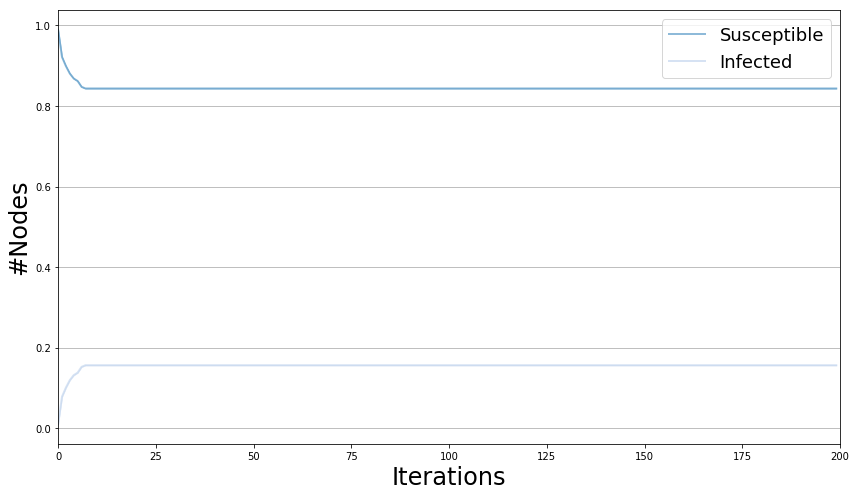

In [173]:
# Model selection
model = th.ThresholdModel(FB_Network)
# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration('Infected', most_influential_nodes)
# Setting node parameters
threshold = 0.33
for i in FB_Network.nodes():
    config.add_node_configuration("threshold", i, threshold)
model.set_initial_status(config)
# Simulation execution
iterations = model.iteration_bunch(200)

# plot the diffusion trend
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
plt.figure(figsize=(12,7))
p1 = viz.plot()

***Which set of 5 nodes emerge as the most influential?*** 

The 5 most influencial nodes are :
   * 348
   * 389 
   * 428   
   * 89   
   * 23

***What percentage of the network does their cascade infect?*** 

As you can see on the figure just above, the cascade corresponding to the 5 most influential nodes as a group of the network succeeded to infect approximately 18% (0.18) percent of the network which represents 90 nodes over 500 nodes. This value is quite high for only five nodes.

***How does this compare to the average reach of randomly infecting 10% of the nodes as done in Questions 1 and 2.***

In the question 1 and 2, we have seen by running the model several times that when 10% of the nodes have been set to the infected state, the spread infected, most of the time, around 20% of the entire network. As the infected nodes corresponding to the 10 percent infected always change, sometimes the total percentage of nodes infected can vary a lot: in fact, it can be less (approximately 0.1) and it can be more (approximately 0.4 sometimes even more). **We can thus conclude that the cascade corresponding to the 5 most influential nodes as a group of the network succeed to infect approximately the same amount of node than when 10% of the network is set infected. This observation shows the influence of these 5 nodes: in fact, they infect the same amount of node than when 50 nodes are set in the infected state.**

### 3.7
***What is the degree of the most influential nodes? How far apart are they in the network (print the pairwise distances)? Do they stand out for any other basic node properties/centrality measures? Test at least 2 or 3 measures.***


In [174]:
# The degree of the most influential nodes
for i in most_influential_nodes:
    print(f'The degree of the node {i} is {FB_Network.degree[i]}')

# Do they stand out for any other basic node properties/centrality measures?
for i in most_influential_nodes:
    print(F'\n#### NODE {i} ####')
    print(f'The degree of this node is {FB_Network.degree[i]} when the max degree is {dict(FB_Network.degree)[max(dict(FB_Network.degree), key=dict(FB_Network.degree).get)]}.')
    print(f'The closeness of this node is {nx.closeness_centrality(FB_Network)[i]} when the max is {nx.closeness_centrality(FB_Network)[max(nx.closeness_centrality(FB_Network), key=nx.closeness_centrality(FB_Network).get)]}.')
    print(f'The betweenness of this node is {nx.betweenness_centrality(FB_Network)[i]} when the max is {nx.betweenness_centrality(FB_Network)[max(nx.betweenness_centrality(FB_Network), key=nx.betweenness_centrality(FB_Network).get)]}.')
    print(f'The PageRank value of this node is {nx.pagerank(FB_Network)[i]} when the max is {nx.pagerank(FB_Network)[max(nx.pagerank(FB_Network), key=nx.pagerank(FB_Network).get)]}.')
    print(f'The EigenVector value of this node is {nx.eigenvector_centrality(FB_Network)[i]} when the max is {nx.eigenvector_centrality(FB_Network)[max(nx.eigenvector_centrality(FB_Network), key=nx.eigenvector_centrality(FB_Network).get)]}.')

# How far apart are they in the network 
shortest_path = pd.DataFrame(index = most_influential_nodes, columns = most_influential_nodes)
for i in most_influential_nodes:
    for j in most_influential_nodes:
        shortest_path.loc[i,j]=nx.shortest_path_length(FB_Network, source=i, target=j, weight=None)
print('\nShortest path lenght between each nodes :')
shortest_path

The degree of the node 348 is 156
The degree of the node 389 is 15
The degree of the node 428 is 49
The degree of the node 89 is 7
The degree of the node 23 is 16

#### NODE 348 ####
The degree of this node is 156 when the max degree is 156.
The closeness of this node is 0.25853182640247835 when the max is 0.32329896907216493.
The betweenness of this node is 0.35639716049347464 when the max is 0.35639716049347464.
The PageRank value of this node is 0.019761704688140855 when the max is 0.019761704688140855.
The EigenVector value of this node is 0.0002015095989515001 when the max is 0.1981462660668606.

#### NODE 389 ####
The degree of this node is 15 when the max degree is 156.
The closeness of this node is 0.22866716118907407 when the max is 0.32329896907216493.
The betweenness of this node is 0.004572176857608259 when the max is 0.35639716049347464.
The PageRank value of this node is 0.0020450368289603397 when the max is 0.019761704688140855.
The EigenVector value of this node is 2.04

,348,389,428,89,23
348,0,1,1,7,6
389,1,0,2,7,6
428,1,2,0,7,6
89,7,7,7,0,3
23,6,6,6,3,0


***What is the degree of the most influential nodes?***
We can see above that the degree of node 348 is high while the others are smaller. One node still has a high degree (node 428 with degree 49) while the three other nodes have a small degree in the order of the average degree in the graph.

***How far apart are they in the network (print the pairwise distances)?***
The general things we can conclude about the pairwise distance is that all these nodes are really close. In fact, the highest distance between these 5 nodes is made of seven nodes which are not a lot for a graph of 500 nodes. On the 10 pairwise distance, 6 distances values of 7 or 6 nodes while 4 distances values are 1, 2 or 3. **We can thus conclude that the distance between the most influential nodes is small.**

***Do they stand out for any other basic node properties/centrality measures? Test at least 2 or 3 measures.***

The node 348, which have been proved to be the most influential of the network has a high degree, closeness, betweenness, and PageRank values while it had a small eigenvector value. **This means that this node is the most influential one mainly due to his high degree. **

All the other nodes of the most influential node as a group have a similar behavior: they have a smaller degree compared to the 348, they have high closeness values while their betweenness, PageRank and eigenvector values are all really low. **All these measures are explaining that these 4 nodes are neither the more central one neither the more influential one in term of centrality measure. However, these nodes are composing the most important group of five nodes in the network. Thus these nodes not stand out (even if they have high closeness values it's not extremely high) for any other basic node properties/centrality measures mainly but due to their proximity (small distance) with the very central node, they are able to be part of the most important group of the network.**


---

In [175]:
#FinalScore = Problem1Score + Problem2Score + Problem3Score
#print("Final score is",FinalScore,"out of 50")